In [1]:
from pathlib import Path
path = Path('/home/ubuntu/code/looking-glass-')

## imports / setup

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


import torch
import re
import torch

from torchvision import datasets
from torchvision import transforms

import utils
from transformer_net import TransformerNet
from vgg import Vgg16

from PIL import Image

In [4]:

models_list = ['candy', 'mosaic', 'rain_princess', 'udnie']

def stylize(inp_img, model):

    with torch.no_grad():
        # setup the process
        device = torch.device("cpu")
        state_dict = torch.load(path/f"""saved_models/{model}.pth""")

        # start net up earlywith torch.no_grad():
        style_model = TransformerNet()
        # remove saved deprecated running_* keys in InstanceNorm from the checkpoint
        for k in list(state_dict.keys()):
            if re.search(r'in\d+\.running_(mean|var)$', k):
                del state_dict[k]
        style_model.load_state_dict(state_dict)
        style_model.to(device)
        style_model.eval()

        
    
    content_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    
    print(content_transform)
    content_image = content_transform(inp_img)
#     print(content_image)
    print(content_image.shape)
    content_image = content_image.unsqueeze(0).to(device)
    print(content_image.shape)
#     print(content_image)
    
    output = style_model(content_image)
        
    return output[0]

In [5]:
from functools import reduce

# cloze {
reduce(lambda x,y: x+y, [ i.numel() for i in TransformerNet().parameters()])
# }

1679235

In [37]:
from lambda_local.main import call

ModuleNotFoundError: No module named 'lambda_local'

In [6]:
def convert_to_image(data):
    data = data.detach()
    img = data.clone().clamp(0, 255).numpy()
    img = img.transpose(1, 2, 0).astype("uint8")
    return Image.fromarray(img)

def load_image(filename, size=None, scale=None):
    img = Image.open(filename)
    if size is not None:
        img = img.resize((size, size), Image.ANTIALIAS)
    elif scale is not None:
        img = img.resize((int(img.size[0] / scale), int(img.size[1] / scale)), Image.ANTIALIAS)
    return img

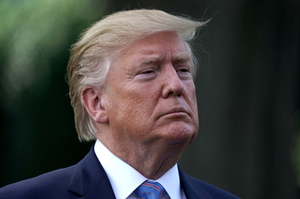

In [53]:
img = Image.open(path/'photos/trump.jpeg') 
MAXWIDTH = 300
s= img.size 
ratio = MAXWIDTH/s[0] 
newimg = img.resize((int(s[0]*ratio), int(s[1]*ratio)), Image.ANTIALIAS)
newimg

In [74]:
content_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.mul(255))
])

torch.tensor(np.array(newimg)).shape
transforms.ToTensor()(newimg).shape
# transforms.Lambda(lambda x: x.mul(255))(transforms.ToTensor()(newimg))

torch.Size([3, 199, 300])

In [30]:
input_img = load_image(path/'photos/trump.jpeg', None, 2)

In [31]:
# input_img = input_img.convert('RGB')

In [32]:
input_img.size

(580, 386)

In [33]:
output = stylize(input_img, 'mosaic')

Compose(
    ToTensor()
    Lambda()
)
torch.Size([3, 386, 580])
torch.Size([1, 3, 386, 580])


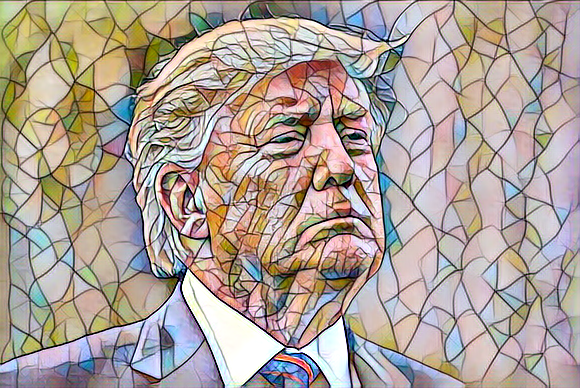

In [35]:
convert_to_image(output)

In [38]:
def generate_image(inp, model):
    output = stylize(input_img, model)
    return convert_to_image(output)

In [31]:
%%time
outputs = []

for m in ['mosaic']:
    im = generate_image(input_img, m)
    outputs.append(im)

Compose(
    ToTensor()
    Lambda()
)
torch.Size([3, 773, 1160])
torch.Size([1, 3, 773, 1160])


AttributeError: 'numpy.ndarray' object has no attribute 'clone'

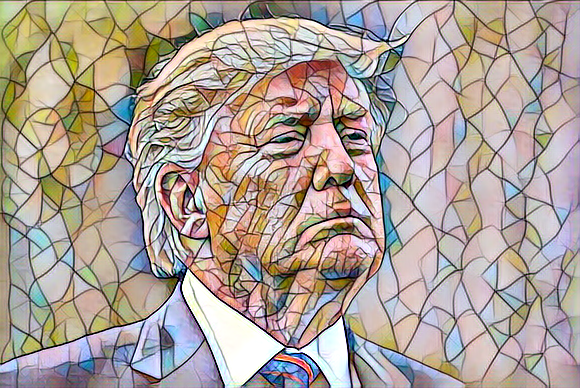

In [34]:
convert_to_image(output)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

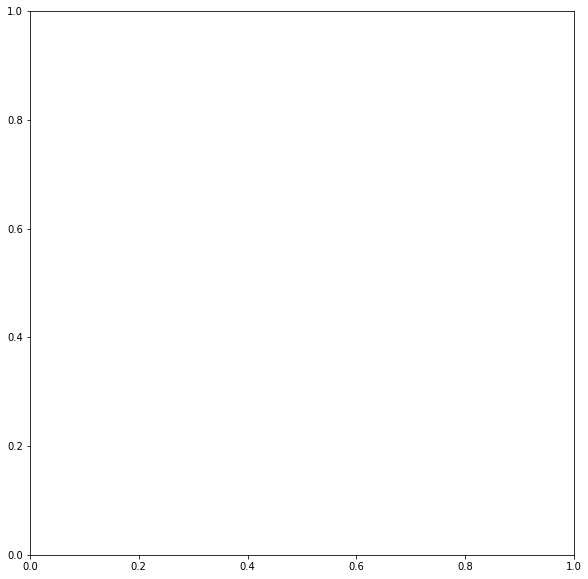

In [15]:
fig, axes = plt.subplots(1,len(['mosiac']), figsize=(20,10))

# for i, ax in enumerate(axes):
plt.imshow(output)

In [ ]:
outputs[0]

In [150]:
outputs[1].save(path/'art/trump.jpeg')

## Functional
